In [67]:
import numpy as np
import pandas as pd

In [68]:
df = pd.read_csv('forestfires.csv')

In [69]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


# Data Preprocessing

In [70]:
df.shape

(517, 13)

In [71]:
df.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [73]:
cols = df.select_dtypes(include=['number'])

for col in cols:
    neg = (df[col] < 0).sum()
    print(f"Negatives in {col} are {neg}")

Negatives in X are 0
Negatives in Y are 0
Negatives in FFMC are 0
Negatives in DMC are 0
Negatives in DC are 0
Negatives in ISI are 0
Negatives in temp are 0
Negatives in RH are 0
Negatives in wind are 0
Negatives in rain are 0
Negatives in area are 0


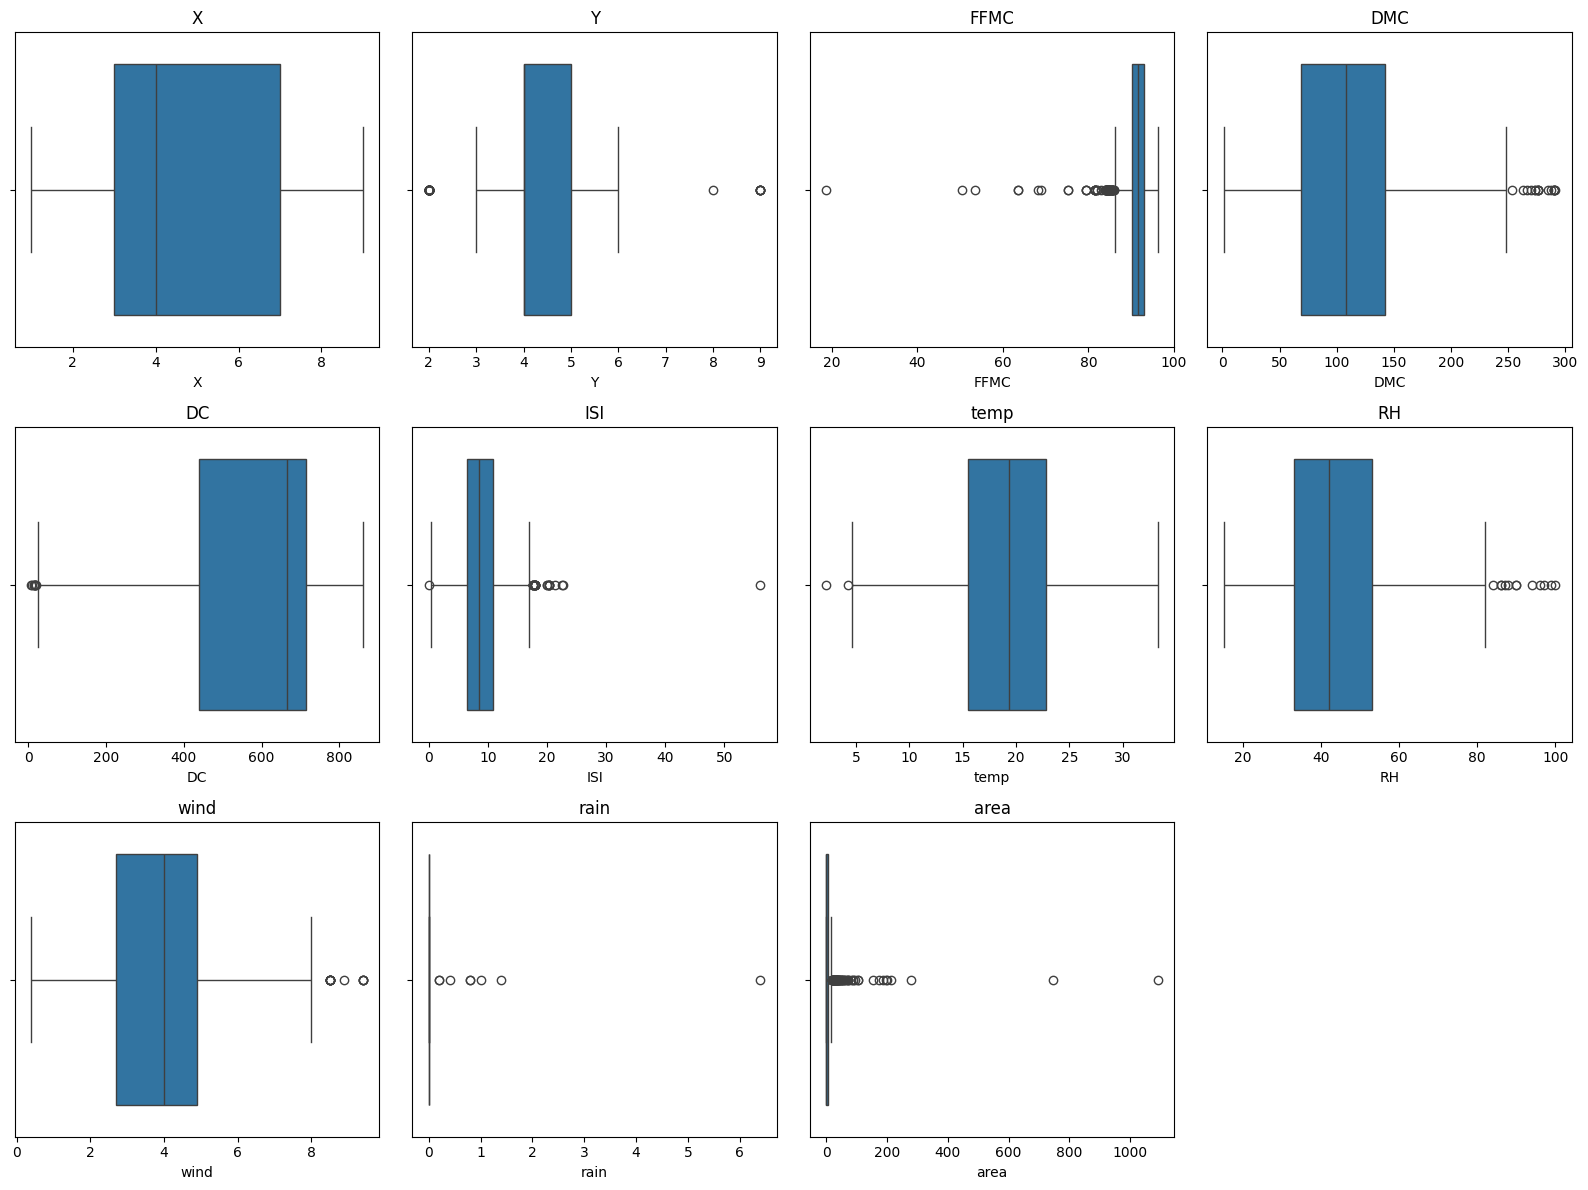

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

def visBoxplots(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    cols = len(numeric_cols)
    
    rows = (cols + 3) // 4
    cols = min(cols, 4)
    
    fig,axes = plt.subplots(rows, cols, figsize=(16,4*rows))
    
    if rows > 1:
        axes = axes.flatten()
        
    for i,col in enumerate(numeric_cols):
        sns.boxplot(x=df[col],ax=axes[i])
        axes[i].set_title(col)
        
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()

visBoxplots(df)

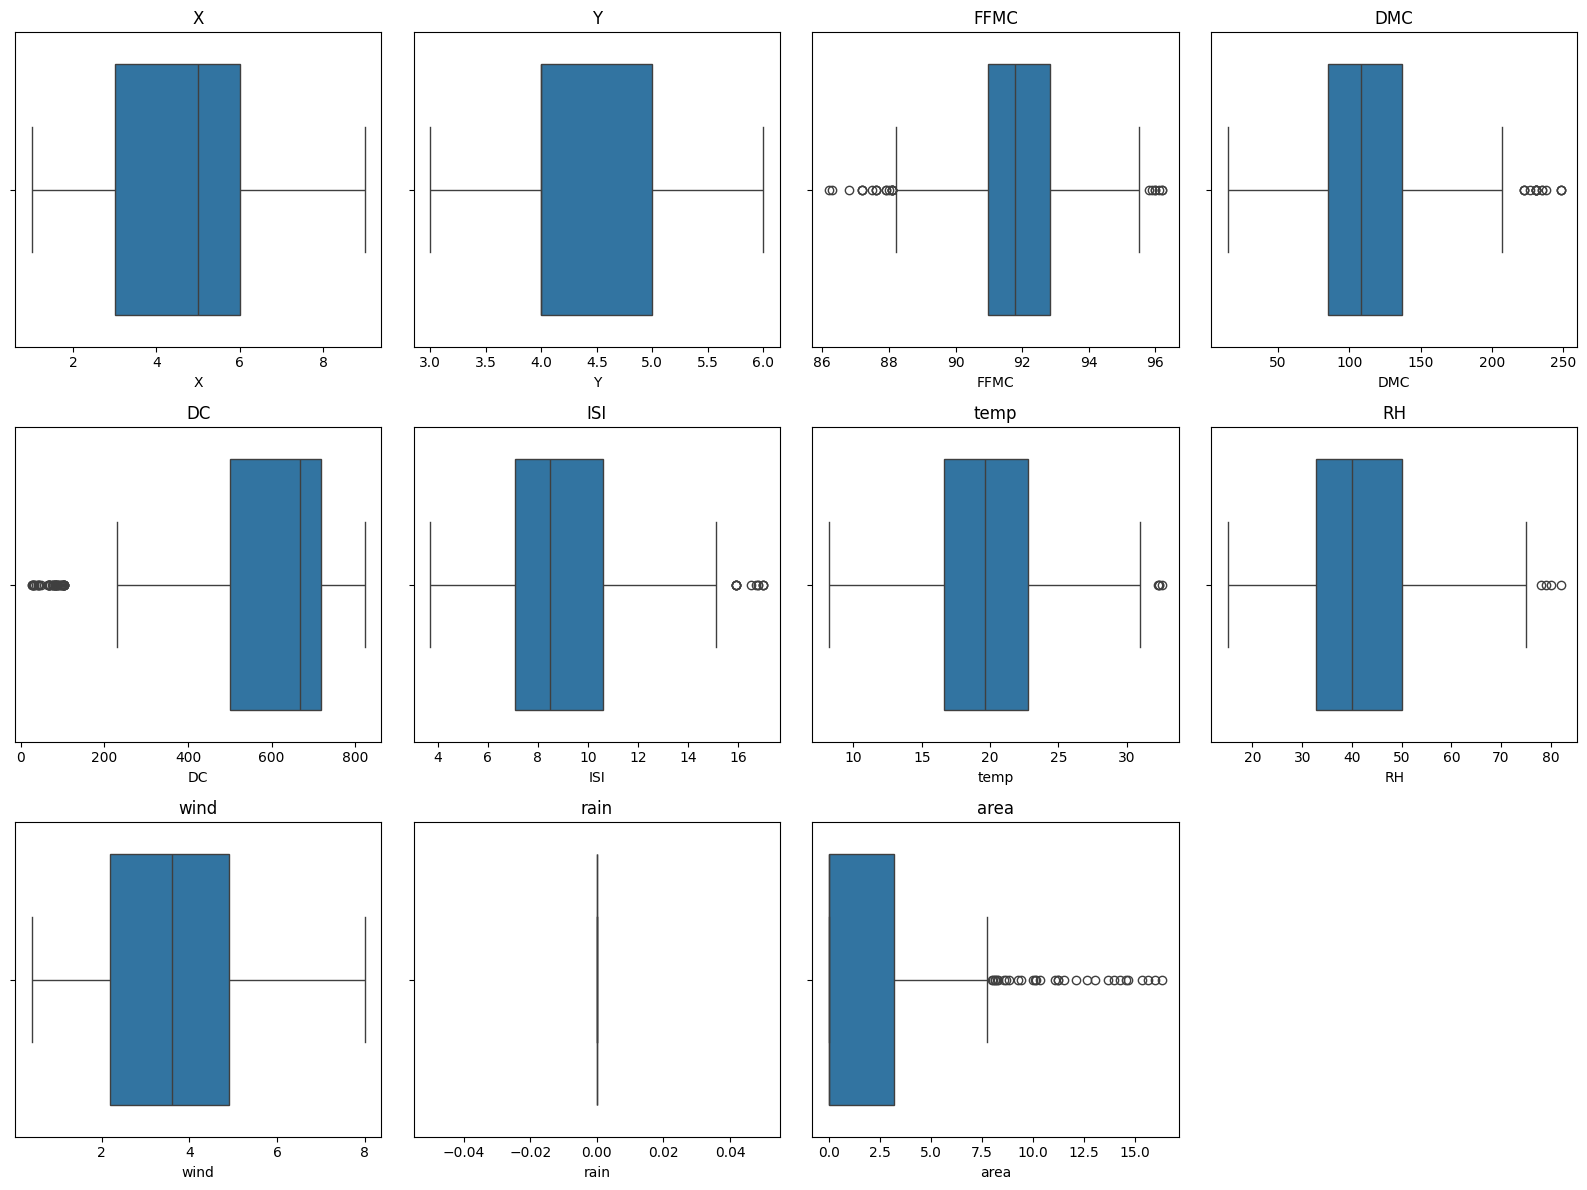

In [75]:
def rem1(df):
    numeric_cols = df.select_dtypes(include=['number'])
    zscore = np.abs((numeric_cols - numeric_cols.mean()) / numeric_cols.std())
    out = zscore > 3
    df = df[~out.any(axis=1)]
    return df

def rem2(df):
    df = df.select_dtypes(include=['number'])
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    
    IQR=Q3 - Q1
    
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    
    df = df[~((df < lower_threshold) | (df > upper_threshold)).any(axis=1)]
    return df

ndf = rem2(df)
df = ndf
visBoxplots(df)

# Creating Data subsets

In [76]:
df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
5,8,6,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0


In [77]:
df['area'].unique()

array([ 0.  ,  0.43,  0.47,  0.77,  0.9 ,  0.95,  1.19,  1.43,  1.46,
        1.56,  1.61,  1.64,  1.69,  1.75,  1.9 ,  1.95,  2.01,  2.29,
        2.51,  2.55,  2.57,  2.74,  3.07,  3.5 ,  4.53,  4.69,  4.88,
        5.23,  5.33,  6.38,  6.83,  6.96,  7.04,  7.19,  7.3 ,  7.4 ,
        8.24,  8.31,  8.68,  9.41, 10.02, 11.06, 11.24, 11.53, 12.1 ,
       13.7 , 13.99, 14.57, 10.13,  2.87,  0.76,  0.09,  0.75,  2.47,
        0.68,  0.24,  0.21,  1.52, 10.34,  8.02,  1.38,  8.85,  4.25,
        6.54,  0.79,  4.4 ,  9.27,  3.09,  8.  ,  2.64,  6.57,  3.52,
        0.41,  5.18, 14.29,  1.58,  3.78,  4.41,  7.21,  1.01,  2.18,
        4.42,  3.33,  6.58, 15.64, 11.22,  2.13,  7.48,  1.47,  3.93,
        6.1 ,  3.71,  7.31,  2.03,  1.72,  5.97, 13.06,  1.26,  8.12,
        1.09,  3.94,  0.52,  2.93,  5.65, 12.64,  7.73, 16.33, 16.  ,
        3.64,  3.63,  8.16,  4.95,  6.04,  1.63,  7.02,  2.44,  3.05,
        0.72,  4.96,  2.35,  3.2 ,  6.36, 15.34,  0.54,  6.43,  0.33,
        1.23,  3.35,

In [78]:
df1 = df[(df['area'] >= 0) & (df['area'] <= 5)]
df1

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
5,8,6,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
495,6,6,96.2,175.5,661.8,16.8,23.9,42,2.2,0.0,0.00
496,4,5,96.2,175.5,661.8,16.8,32.6,26,3.1,0.0,2.77
507,2,4,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00
510,6,5,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43


In [79]:
df2 = df[(df['area'] >= 6) & (df['area'] <= 10)]
df2

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
182,5,4,86.8,15.6,48.3,3.9,12.4,53,2.2,0.0,6.38
183,7,4,91.7,48.5,696.1,11.1,16.8,45,4.5,0.0,6.83
184,8,6,93.9,135.7,586.7,15.1,20.8,34,4.9,0.0,6.96
185,2,5,91.0,129.5,692.6,7.0,17.6,46,3.1,0.0,7.04
186,8,6,89.3,51.3,102.2,9.6,11.5,39,5.8,0.0,7.19
187,1,5,90.9,126.5,686.5,7.0,21.0,42,2.2,0.0,7.30
188,6,4,90.8,41.9,89.4,7.9,13.3,42,0.9,0.0,7.40
189,7,4,90.7,44.0,92.4,5.5,11.5,60,4.0,0.0,8.24
190,6,5,91.2,48.3,97.8,12.5,11.7,33,4.0,0.0,8.31
191,2,5,95.2,131.7,578.8,10.4,24.2,28,2.7,0.0,8.68


In [80]:
df3 = df[(df['area'] >= 11) & (df['area'] <= 15)]
df3

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
197,4,5,92.9,137.0,706.4,9.2,21.5,15,0.9,0.0,11.06
198,3,4,91.0,129.5,692.6,7.0,13.9,59,6.3,0.0,11.24
200,1,5,91.0,129.5,692.6,7.0,21.6,33,2.2,0.0,11.53
201,6,5,90.1,37.6,83.7,7.2,12.4,54,3.6,0.0,12.10
203,8,6,91.4,37.9,673.8,5.2,20.2,37,2.7,0.0,13.70
204,5,6,90.6,50.1,100.4,7.8,15.1,64,4.0,0.0,13.99
205,4,5,92.9,137.0,706.4,9.2,22.1,34,1.8,0.0,14.57
311,6,3,92.4,105.8,758.1,9.9,24.8,28,1.8,0.0,14.29
332,4,4,91.2,124.4,795.3,8.5,17.1,41,2.2,0.0,11.22
355,4,4,92.1,99.0,745.3,9.6,20.8,35,4.9,0.0,13.06


# Merging two subsets

In [81]:
df_merged = pd.concat([df1, df2])
df_merged

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
5,8,6,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
431,1,3,92.1,178.0,605.3,9.6,23.3,40,4.0,0.0,6.36
438,2,5,93.7,231.1,715.1,8.4,23.6,53,4.0,0.0,6.43
468,6,5,91.3,20.6,43.5,8.5,13.3,27,3.6,0.0,6.61
477,4,3,93.7,101.3,423.4,14.7,26.1,45,4.0,0.0,7.36


In [82]:
df_merged['area'].unique()

array([0.  , 0.43, 0.47, 0.77, 0.9 , 0.95, 1.19, 1.43, 1.46, 1.56, 1.61,
       1.64, 1.69, 1.75, 1.9 , 1.95, 2.01, 2.29, 2.51, 2.55, 2.57, 2.74,
       3.07, 3.5 , 4.53, 4.69, 4.88, 2.87, 0.76, 0.09, 0.75, 2.47, 0.68,
       0.24, 0.21, 1.52, 1.38, 4.25, 0.79, 4.4 , 3.09, 2.64, 3.52, 0.41,
       1.58, 3.78, 4.41, 1.01, 2.18, 4.42, 3.33, 2.13, 1.47, 3.93, 3.71,
       2.03, 1.72, 1.26, 1.09, 3.94, 0.52, 2.93, 3.64, 3.63, 4.95, 1.63,
       2.44, 3.05, 0.72, 4.96, 2.35, 3.2 , 0.54, 0.33, 1.23, 3.35, 3.32,
       3.18, 1.94, 1.76, 2.21, 1.29, 2.77, 6.38, 6.83, 6.96, 7.04, 7.19,
       7.3 , 7.4 , 8.24, 8.31, 8.68, 9.41, 8.02, 8.85, 6.54, 9.27, 8.  ,
       6.57, 7.21, 6.58, 7.48, 6.1 , 7.31, 8.12, 7.73, 8.16, 6.04, 7.02,
       6.36, 6.43, 6.61, 7.36, 8.59])

# Sorting

In [83]:
df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
5,8,6,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0


In [84]:
df_sorted = df.sort_values(by=['temp'])
df_sorted

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
77,1,3,87.6,52.2,103.8,5.0,8.3,72,3.1,0.0,0.00
378,6,5,90.9,18.9,30.6,8.0,8.7,51,5.8,0.0,0.00
447,3,4,93.4,17.3,28.3,9.9,8.9,35,8.0,0.0,0.00
126,3,5,87.6,52.2,103.8,5.0,9.0,49,2.2,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
483,8,6,94.9,130.3,587.1,14.1,31.0,27,5.4,0.0,0.00
497,3,4,96.1,181.1,671.2,14.3,32.3,27,2.2,0.0,14.68
491,4,4,95.8,152.0,624.1,13.8,32.4,21,4.5,0.0,0.00
492,1,3,95.9,158.0,633.6,11.3,32.4,27,2.2,0.0,0.00


In [85]:
df_sorted = df.sort_values(by=['wind'])
df_sorted

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
249,3,4,93.1,157.3,666.7,13.5,21.7,40,0.4,0.0,2.47
372,4,5,92.0,203.2,664.5,8.1,10.4,75,0.9,0.0,0.00
129,2,5,92.6,46.5,691.8,8.8,15.4,35,0.9,0.0,0.00
197,4,5,92.9,137.0,706.4,9.2,21.5,15,0.9,0.0,11.06
166,6,5,92.1,111.2,654.1,9.6,16.6,47,0.9,0.0,2.29
...,...,...,...,...,...,...,...,...,...,...,...
114,3,4,88.1,25.7,67.6,3.8,15.8,27,7.6,0.0,0.00
244,2,4,91.8,175.1,700.7,13.8,22.4,54,7.6,0.0,2.87
265,4,4,93.7,102.2,550.3,14.6,22.1,54,7.6,0.0,0.79
31,6,3,88.6,91.8,709.9,7.1,11.2,78,7.6,0.0,0.00


In [86]:
df_sorted = df.sort_values(by=['area'])
df_sorted

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
298,8,6,91.2,147.8,377.2,12.7,19.6,43,4.9,0.0,0.00
300,6,5,90.4,93.3,298.1,7.5,20.7,25,4.9,0.0,0.00
302,3,6,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00
303,3,6,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
497,3,4,96.1,181.1,671.2,14.3,32.3,27,2.2,0.0,14.68
433,2,4,93.6,235.1,723.1,10.1,20.9,66,4.9,0.0,15.34
331,7,4,91.2,124.4,795.3,8.5,21.5,28,4.5,0.0,15.64
385,2,4,91.6,181.3,613.0,7.6,20.9,50,2.2,0.0,16.00


# Transposing Data

In [87]:
df_transposed = df.transpose()
df_transposed

,0,1,2,5,6,8,9,10,13,14,...,483,491,492,494,495,496,497,507,510,515
X,7.0,7.0,7.0,8.0,8.0,8.0,7.0,7.0,6.0,6.0,...,8.0,4.0,1.0,6.00,6.0,4.00,3.00,2.0,6.00,1.0
Y,5.0,4.0,4.0,6.0,6.0,6.0,5.0,5.0,5.0,5.0,...,6.0,4.0,3.0,6.00,6.0,5.00,4.00,4.0,5.00,4.0
FFMC,86.2,90.6,90.6,92.3,92.3,91.0,92.5,92.5,90.9,92.9,...,94.9,95.8,95.9,96.00,96.2,96.20,96.10,91.0,91.00,94.4
DMC,26.2,35.4,43.7,85.3,88.9,129.5,88.0,88.0,126.5,133.3,...,130.3,152.0,158.0,164.00,175.5,175.50,181.10,166.9,166.90,146.0
DC,94.3,669.1,686.9,488.0,495.6,692.6,698.6,698.6,686.5,699.6,...,587.1,624.1,633.6,643.00,661.8,661.80,671.20,752.6,752.60,614.7
ISI,5.1,6.7,6.7,14.7,8.5,7.0,7.1,7.1,7.0,9.2,...,14.1,13.8,11.3,14.00,16.8,16.80,14.30,7.1,7.10,11.3
temp,8.2,18.0,14.6,22.2,24.1,13.1,22.8,17.8,21.3,26.4,...,31.0,32.4,32.4,30.80,23.9,32.60,32.30,25.9,18.20,25.6
RH,51.0,33.0,33.0,29.0,27.0,63.0,40.0,51.0,42.0,21.0,...,27.0,21.0,27.0,30.00,42.0,26.00,27.00,41.0,62.00,42.0
wind,6.7,0.9,1.3,5.4,3.1,5.4,4.0,7.2,2.2,4.5,...,5.4,4.5,2.2,4.90,2.2,3.10,2.20,3.6,5.40,4.0
rain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0


# Melting data to long format

In [88]:
df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
5,8,6,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0


In [89]:
df_melted = pd.melt(df, id_vars=['X','Y'], var_name='Metrics', value_name='Values')
df_melted 

,X,Y,Metrics,Values
0,7,5,FFMC,86.20
1,7,4,FFMC,90.60
2,7,4,FFMC,90.60
3,8,6,FFMC,92.30
4,8,6,FFMC,92.30
...,...,...,...,...
2839,4,5,area,2.77
2840,3,4,area,14.68
2841,2,4,area,0.00
2842,6,5,area,0.43


# Casting to Wide format

In [90]:
df_casted = df_melted.pivot_table(index=['X','Y'], columns='Metrics', values='Values').reset_index()
df_casted

Metrics,X,Y,DC,DMC,FFMC,ISI,RH,area,rain,temp,wind
0,1,3,600.642857,131.471429,92.157143,9.128571,42.714286,1.820000,0.0,22.214286,4.000000
1,1,4,676.600000,108.060000,91.730000,8.950000,40.300000,2.592000,0.0,20.440000,3.290000
2,1,5,700.166667,133.800000,91.766667,7.366667,34.000000,6.763333,0.0,24.066667,2.366667
3,2,3,764.000000,108.400000,91.600000,6.200000,51.000000,0.000000,0.0,18.000000,5.400000
4,2,4,640.835000,137.350000,92.290000,9.570000,42.600000,3.687000,0.0,21.845000,3.610000
5,2,5,620.005882,128.964706,92.111765,8.870588,43.470588,3.120588,0.0,21.111765,3.364706
6,3,3,751.500000,102.300000,92.200000,8.400000,27.000000,6.580000,0.0,24.200000,3.100000
7,3,4,529.785294,108.994118,91.761765,9.547059,41.382353,1.492647,0.0,18.764706,4.279412
8,3,5,410.700000,71.283333,89.900000,5.450000,40.333333,0.363333,0.0,14.233333,3.433333
9,3,6,457.850000,109.700000,91.375000,7.425000,50.000000,0.000000,0.0,17.800000,3.350000
